Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %
[ 0.69314718  0.58450836  0.46694904  0.37600687  0.33146329  0.30327307
  0.27987959  0.26004214  0.24294068  0.22800422  0.21481951  0.20307819
  0.19254428  0.18303334  0.17439859  0.1665214   0.15930452  0.15266732
  0.14654224  0

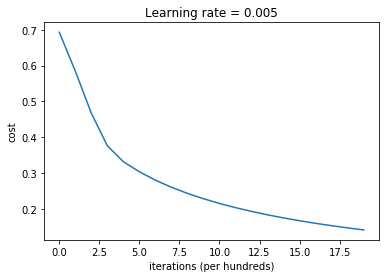

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------

[ 0.69314718  0.82392087  0.41894396  0.61734971  0.52211577  0.38770875
  0.23625446  0.15422213  0.13532783  0.12497148  0.11647833  0.10919251
  0.10280446  0.09712981  0.09204327]
[ 0.69314718  0.59128943  0.55579611  0.52897651  0.50688129  0.48787986
  0.47110828  0.45604581  0.44235023  0.42978172  0.41816382  0.40736175
  0.39726947  0.38780161  0.37888813]
[ 0.69314718  0.64367676  0.63573718  0.62857205  0.6220395   0.61602938
  0.61045508  0.60524817  0.60035419  0.59572948  0.59133877  0.58715328
  0.58314936  0.57930739  0.57561095]


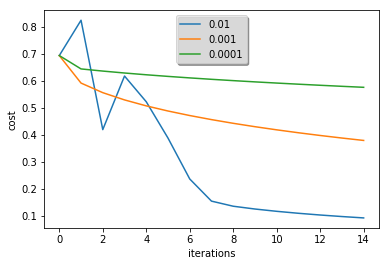

In [1]:
# %load Logistic-Regression-with-a-Neural-Network-mindset.py
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

# Only for IPython
%matplotlib inline

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

index = 207
#plt.imshow(train_set_x_orig[index])
# print(train_set_y[:, 0])
# print(np.squeeze(train_set_y[:, 0]))
# print(classes)
#print("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode('utf-8') + "' picture.")

#print(train_set_x_orig.shape[1])


# m_train = train_set_x_orig.shape[0]
# m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]


# print("Number of training examples: m_train = " + str(m_train))
# print("Number of testing examples: m_test = " + str(m_test))
# print("Height/Width of each image: num_px = " + str(num_px))
# print("Each image is of size: (" + str(num_px) + ", " + str(num_px)  + ", 3)")
# print("train_set_x shape: " + str(train_set_x_orig.shape))
# print("train_set_y shape: " + str(train_set_y.shape))
# print("test_set_x shape: " + str(test_set_x_orig.shape))
# print("teest_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
# print("train_set_y shape: " + str(train_set_y.shape))
# print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
# print("test_set_y shape: " + str(test_set_y.shape))
# print("sanity check after reshaping: " + str(train_set_x_flatten[0:5, 0]))

train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    s -- sigmoid(x)
    """
    s = 1 / (1 + np.exp(-x))
    return s

# print("sigmoid([0, 2]) = " + str(sigmoid(np.array([0, 2]))))

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (correspons to the bias)
    """
    w = np.zeros((dim, 1))
    b = 0
    assert((dim, 1) == w.shape)
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

# dim = 2
# w, b = initialize_with_zeros(dim)
# print("w = " + str(w))
# print("b = " + str(b))

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if not-cat, 1 if cat) of size (1, number of examples)
    
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(np.dot(Y, np.log(A).T) + np.dot((1-Y), np.log(1-A).T))/m
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(X, (A-Y).T)/m
    # dw = (X*(A-Y).T)/m
    db = np.sum(A-Y)/m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    return grads, cost

# w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1, 2], [3, 4]]), np.array([[1, 0]])
# grads, cost = propagate(w, b, X, Y)
# print("dw = " + str(grads["dw"]))
# print("db = " + str(grads["db"]))
# print("cost = " + str(cost))

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Argument:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, ascalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape(1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function 
    """
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

# params, grads, costs = optimize(w, b, X, Y, num_iterations = 100, learning_rate = 0.009, print_cost = False)
# print("w = " + str(params["w"]))
# print("b = " + str(params["b"]))
# print("dw = " + str(grads["dw"]))
# print("db = " + str(grads["db"]))

def predict(w, b, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    """
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m), dtype = np.int8)
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
    Y_prediction = (A + 0.5).astype(np.int8)
#     for i in range(A.shape[1]):
#         # Convert probabilities A[0, i] to actual predictions p[0, i]
#         if A[0, i] <= 0.5:
#             Y_prediction[0, i] = 0
#         else:
#             Y_prediction[0, i] = 1
        
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

# print("predictions = " + str(predict(w, b, X)))


def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # predict test/train set examples
    Y_prediction_test = predict(parameters['w'], parameters['b'], X_test)
    Y_prediction_train = predict(parameters['w'], parameters['b'], X_train)
    
    # print train/test errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100- np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs, 
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    
    return d

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

# index = 1
# plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
# print("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") + "\" picture.")

costs = np.squeeze(d['costs'])
print(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()

learning_rates= [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print('\n' + "-------------------------------------------------------" + '\n')
    
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label = str(models[str(i)]["learning_rate"]))
    
plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc = 'upper center', shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

# my_image = "my_image.jgp"

# fname = "images/" + my_image
# image = np.array(ndimage.imread(fname, flatten = False))
# my_image = scipy.misc.imresize(image, size = (num_px, num_px)).reshape((1, num_px * num_px * 3)).T
# my_predicted_image = predict(d['w'], b['b'], my_image)

# plt.imshow(image)
# print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")